In [1]:
import os
os.chdir('..')

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import oifits as oi
import datetime

In [2]:
oidata = oi.open('./data/syntheticData/staticBlackhole/UVdata/blackhole-01-10.oifits')

Opening ./data/syntheticData/staticBlackhole/UVdata/blackhole-01-10.oifits
1 wavelength table with 1 wavelength in total
1 target
1 array with 9 stations
891 visibility measurements
891 visibility^2 measurements
1159 closure phase measurements


Text(0, 0.5, 'v [Wavelengths]')

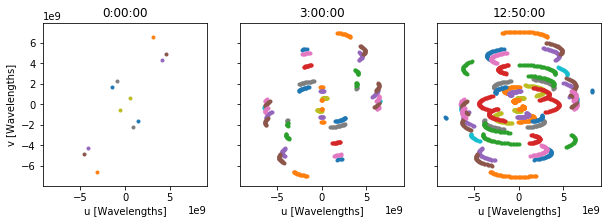

In [3]:
wav = oidata.wavelength['WAVELENGTH_NAME'].eff_wave[0]   
vdata = oidata.vis
U = np.array([k.ucoord/wav for k in vdata])
U = np.concatenate((U,-U))
V = np.array([k.vcoord/wav for k in vdata])
V = np.concatenate((V,-V))
stations = []
times = []
for k in vdata:
    stations.append(k.station[0].sta_name + '-' + k.station[1].sta_name)
    t = k.timeobs.time()
    times.append((t.hour * 60 + t.minute) * 60 + t.second)
stations = np.array(stations)
stations = np.concatenate((stations,stations))
times = np.array(times)
times = np.concatenate((times,times))
args = np.argsort(stations)
times = times[args]
U = U[args]
V = V[args]
stations = stations[args]
stations, counts = np.unique(stations,return_counts=True)
fig, axs = plt.subplots(1, 3, figsize=(10,3), sharex=True, sharey=True)
for idx, t in enumerate([0,10800,46200]):
    i = 0
    for station, c in zip(stations,counts):
        c = c.astype(int)
        times_temp = times[i:i + c]
        args = np.where(times_temp <= t)
        U_temp = U[i:i + c]
        U_temp = U_temp[args]
        V_temp = V[i:i + c]
        V_temp = V_temp[args]
        axs[idx].scatter(U_temp, V_temp, marker='.', label=station)
        axs[idx].set_xlabel("u [Wavelengths]")
        
        axs[idx].set_title(str(datetime.timedelta(seconds=t)))
        i += c
axs[0].set_ylabel("v [Wavelengths]")

In [4]:
fig.savefig("./figure_05.pdf",  bbox_inches="tight")